In [37]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
%matplotlib inline     
sns.set(color_codes=True)

In [95]:
df = pd.read_csv("FinancialMarketData.xlsx - EWS.csv")
# To display the top 5 rows 
df.shape   

(1111, 44)

In [6]:
#data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y          1111 non-null   int64  
 1   Data       1111 non-null   object 
 2   XAU BGNL   1111 non-null   float64
 3   ECSURPUS   1111 non-null   float64
 4   BDIY       1111 non-null   float64
 5   CRY        1111 non-null   float64
 6   DXY        1111 non-null   float64
 7   JPY        1111 non-null   float64
 8   GBP        1111 non-null   float64
 9   Cl1        1111 non-null   float64
 10  VIX        1111 non-null   float64
 11  USGG30YR   1111 non-null   float64
 12  GT10       1111 non-null   float64
 13  USGG2YR    1111 non-null   float64
 14  USGG3M     1111 non-null   float64
 15  US0001M    1111 non-null   float64
 16  GTDEM30Y   1111 non-null   float64
 17  GTDEM10Y   1111 non-null   float64
 18  GTDEM2Y    1111 non-null   float64
 19  EONIA      1111 non-null   float64
 20  GTITL30Y

In [82]:
# describing the data
df.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


Text(0.5, 1.0, 'JPY vs GBP')

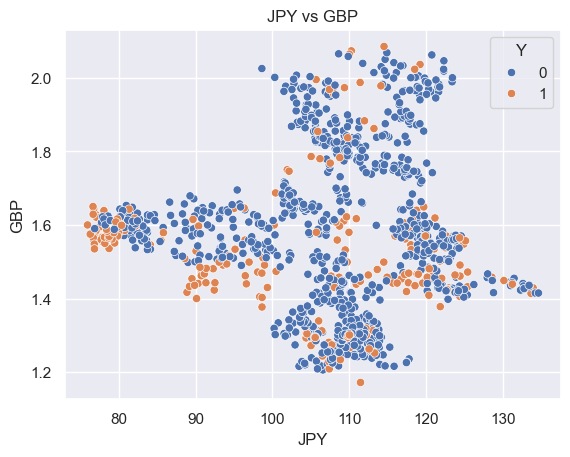

In [85]:
sns.scatterplot(data=df, x="JPY",y="GBP", hue="Y")
plt.title("JPY vs GBP")

In [88]:
from sklearn.ensemble import IsolationForest

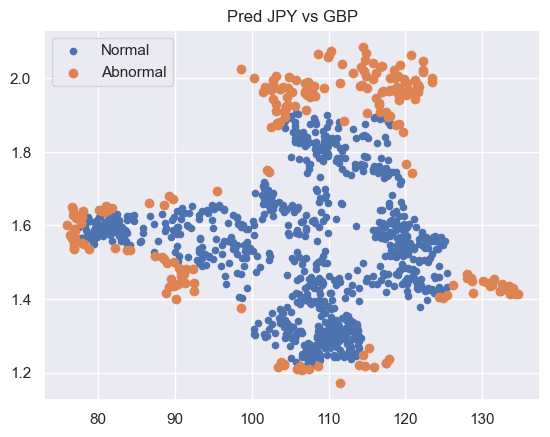

In [109]:
clf = IsolationForest(contamination=0.2)
clf.fit(df[['JPY','GBP']])
pred = clf.predict(df[['JPY','GBP']])
abn_idx = np.where(pred <0)
x = df[['JPY','GBP']]
abn_idx = np.where(pred <0)
plt.scatter(df['JPY'],df['GBP'],s=20)
plt.scatter(x.iloc[abn_idx]['JPY'],x.iloc[abn_idx]['GBP'])
plt.title("Pred JPY vs GBP")
plt.legend(["Normal","Abnormal"])

In [139]:
# df['JPY_diff']
# get the difference between the current and previous day
df['JPY_diff'] = 0 * df.shape[0]
for i in range(0,df.shape[0]):
    # print(df['JPY'][i])
    if i == 0:
        df['JPY_diff'][i] = 0
        continue
    df['JPY_diff'][i] = df['JPY'][i] - df['JPY'][i-1]


df['GBP_diff'] = 0 * df.shape[0]
for i in range(0,df.shape[0]):
    # print(df['JPY'][i])
    if i == 0:
        df['GBP_diff'][i] = 0
        continue
    df['GBP_diff'][i] = df['GBP'][i] - df['GBP'][i-1]

df.head()

/var/folders/c7/zl2zh_g97b933zx6_8bbgh3c0000gn/T/ipykernel_52668/368243315.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['JPY_diff'][i] = 0
/var/folders/c7/zl2zh_g97b933zx6_8bbgh3c0000gn/T/ipykernel_52668/368243315.py:7: SettingWith

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,JPY_diff,GBP_diff
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30,0.00,0.000
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74,-0.39,-0.008
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46,0.57,0.012
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29,1.81,-0.039
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32,1.45,0.000


Text(0.5, 1.0, 'JPY_diff vs GBP_diff')

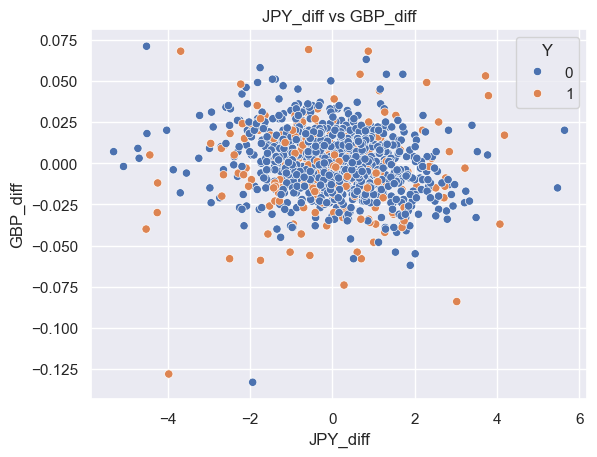

In [140]:
sns.scatterplot(data=df, x="JPY_diff",y="GBP_diff", hue="Y")
plt.title("JPY_diff vs GBP_diff")

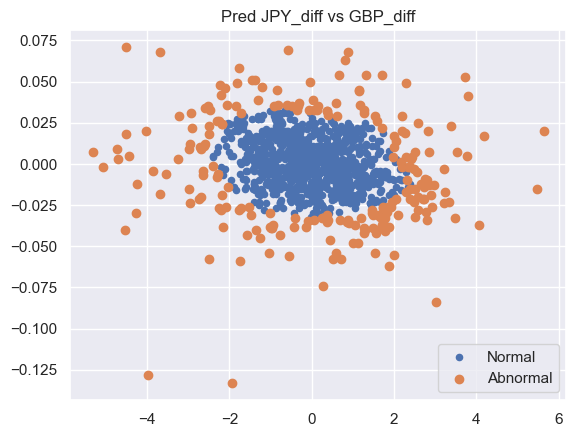

In [141]:
clf = IsolationForest(contamination=0.2)
clf.fit(df[['JPY_diff','GBP_diff']])
pred = clf.predict(df[['JPY_diff','GBP_diff']])
abn_idx = np.where(pred <0)
x = df[['JPY_diff','GBP_diff']]
abn_idx = np.where(pred <0)
plt.scatter(df['JPY_diff'],df['GBP_diff'],s=20)
plt.scatter(x.iloc[abn_idx]['JPY_diff'],x.iloc[abn_idx]['GBP_diff'])
plt.title("Pred JPY_diff vs GBP_diff")
plt.legend(["Normal","Abnormal"])

In [142]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles

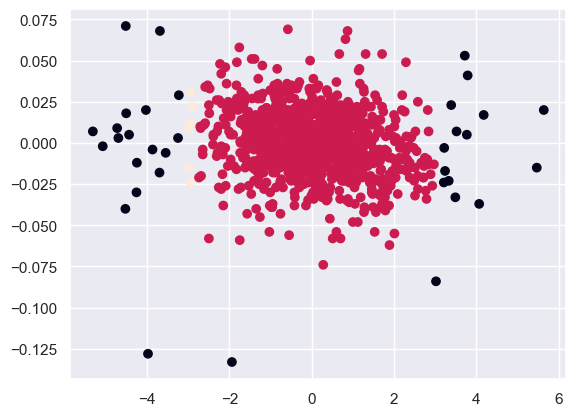

In [159]:
dbcan = DBSCAN(eps=0.10)
dbcan.fit_predict(df[['JPY_diff','GBP_diff']])
dbcan.labels_
plt.scatter(df["JPY_diff"],df["GBP_diff"],c=dbcan.labels_)

<Axes: xlabel='Y', ylabel='VIX'>

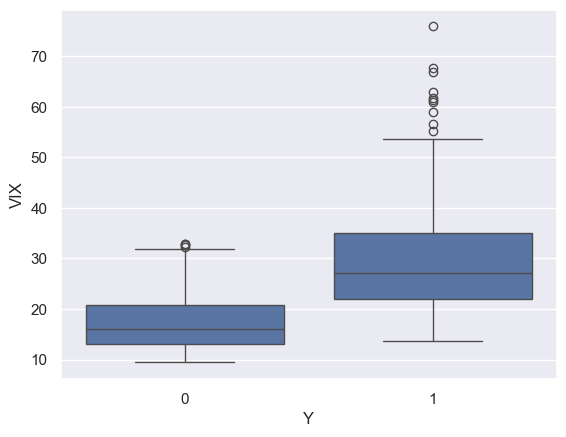

In [115]:
#plotting box plot between alcohol and quality
sns.boxplot(x='Y', y="VIX", data=df)
